# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATASETS

In [15]:
data = pd.read_csv("E:\data\Diwali Sales Data.csv", encoding="unicode_escape")

In [16]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
data.shape

(11251, 15)

In [17]:
# drop unwanted blank columns
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [22]:
#checking for null values
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [28]:
# removing null values
data.dropna(inplace=True)

In [29]:
data.shape

(11239, 13)

In [34]:
data.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
728,1001836,Brian,P00171342,F,26-35,32,0,Andhra Pradesh,Southern,IT Sector,Food,2,19301.0
10016,1002051,Hackney,P00081742,F,36-45,45,1,Karnataka,Southern,Media,Pet Care,1,3511.0
10983,1001993,Swapnil,P00032042,F,36-45,45,1,Madhya Pradesh,Central,Automobile,Beauty,4,1591.0
6159,1001881,Fortune-,P00022542,F,36-45,37,0,Uttar Pradesh,Central,Healthcare,Decor,1,7929.0
1038,1000137,Steve,P00368042,M,46-50,50,0,Karnataka,Southern,Automobile,Footwear & Shoes,2,16920.0


In [114]:
# cahnging the data type
data['Amount']=data['Amount'].astype('int')
data.sample(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
3333,1001755,Eason,P00190542,M,18-25,18,0,Kerala,Southern,Agriculture,Food,3,11880
2466,1002011,Brijesh,P00193542,M,36-45,44,0,Delhi,Central,Retail,Sports Products,3,13662
1179,1002774,Vijay,P00209342,F,26-35,31,0,Uttar Pradesh,Central,IT Sector,Footwear & Shoes,1,16691
2960,1006000,Weirich,P00303242,F,46-50,50,1,Karnataka,Southern,Media,Footwear & Shoes,3,12361
5271,1004088,Clytie,P00231242,F,26-35,26,0,Jharkhand,Eastern,Chemical,Clothing & Apparel,2,8577


# Exploratory Data Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_3528\4133810447.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Gender', data=data, palette='magma')


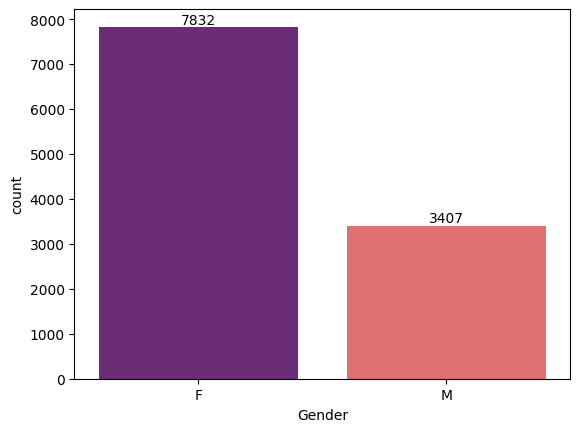

In [55]:
#count of male vs female 
ax=sns.countplot(x='Gender', data=data, palette='magma')

for bars in ax.containers:
    ax.bar_label(bars)

In [58]:
# getting the amount according to total female and male
data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


## Summary - Most of the buyers are females and even the female power of purchasing is more than male

<Axes: xlabel='Age Group', ylabel='count'>

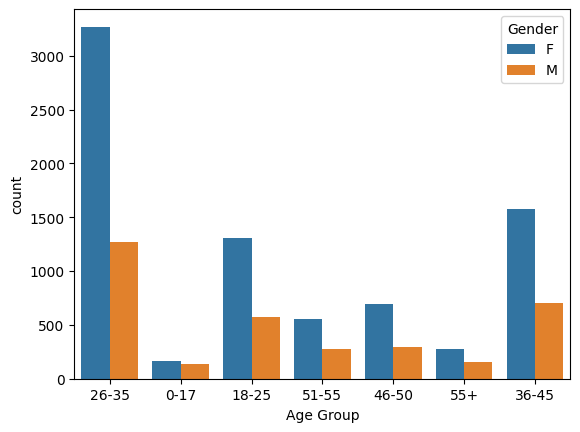

In [62]:
# buyers according to age group of different gender
sns.countplot(data=data, x='Age Group', hue='Gender')

## most of the customers are between the age group of 26-35.

In [71]:
# Total amount vs Total age group
data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


## most of the buyers are of age group 26-35

C:\Users\User\AppData\Local\Temp\ipykernel_3528\3293446618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale, x='State', y='Orders',palette='magma')


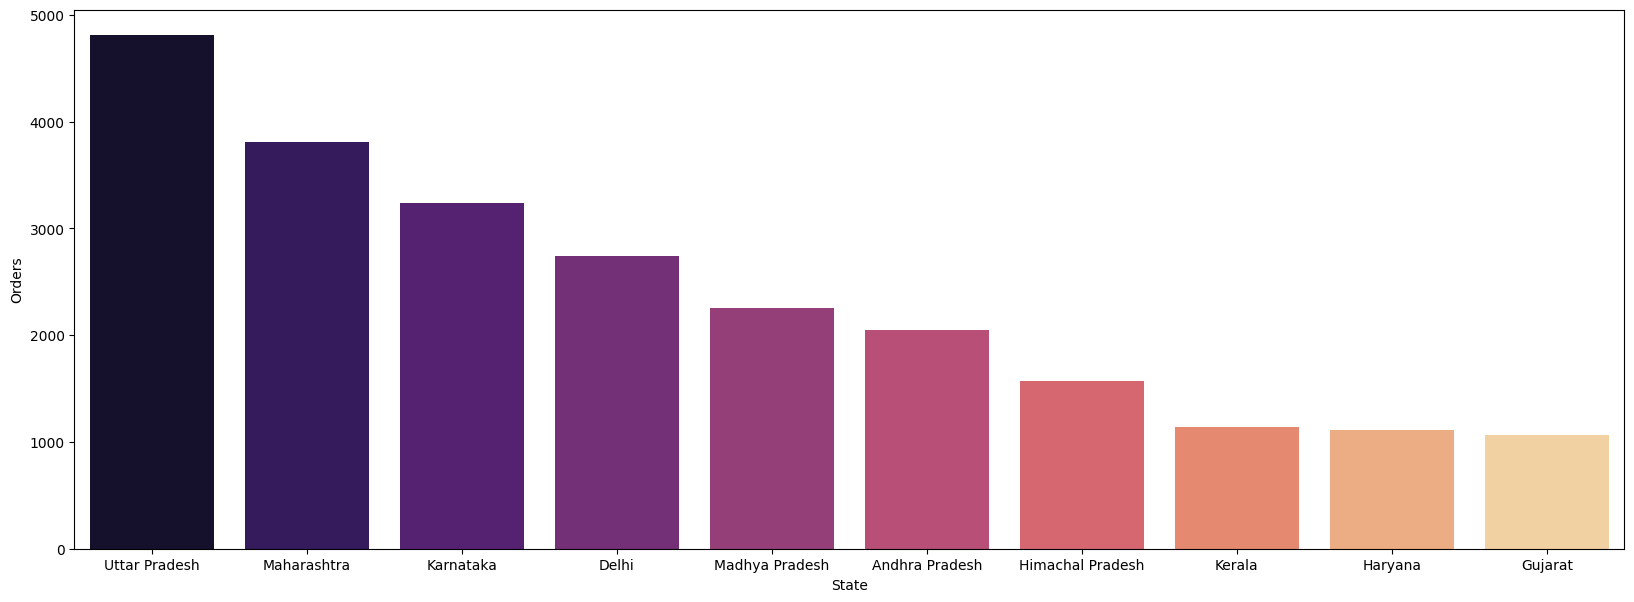

In [111]:
# total number of orders by top 10 state
sale=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(20,7))
sns.barplot(data=sale, x='State', y='Orders',palette='magma')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3528\2864539268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale, x='State', y='Amount',palette='viridis')


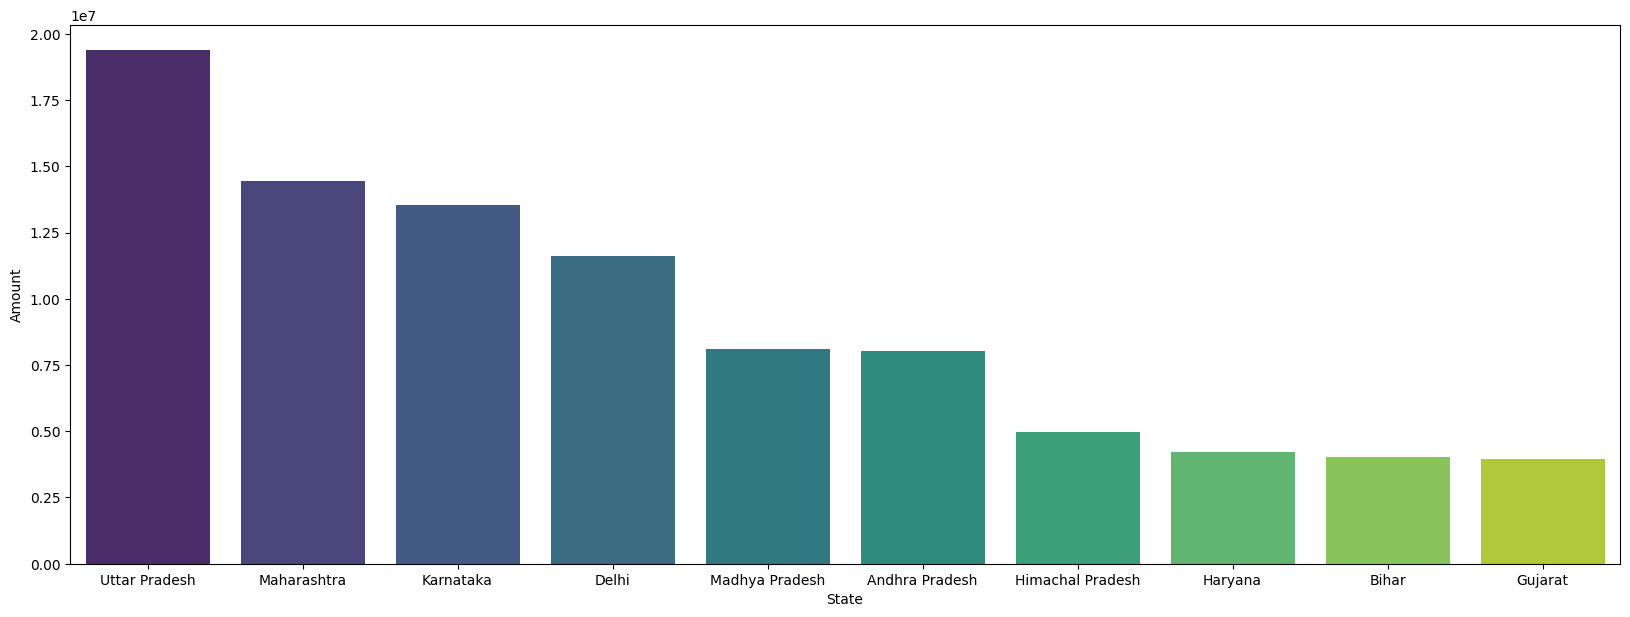

In [112]:
# total amount by top 10 state
sale=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(20,7))
sns.barplot(data=sale, x='State', y='Amount',palette='viridis')
plt.show()

## Most of the orders and amount spend is that of Uttar Pradesh, Maharashtra, Karnataka but purchasing amount is more that of Haryana than Kerela which had more number of orders.

<Axes: xlabel='Marital_Status', ylabel='count'>

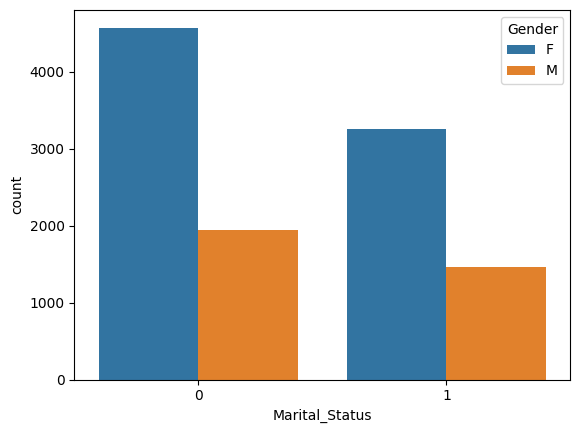

In [113]:
# 1- married, 0-non-married
sns.countplot(data=data, x='Marital_Status', hue='Gender')

C:\Users\User\AppData\Local\Temp\ipykernel_3528\2885001169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale, x='Marital_Status', y='Amount',palette='viridis')


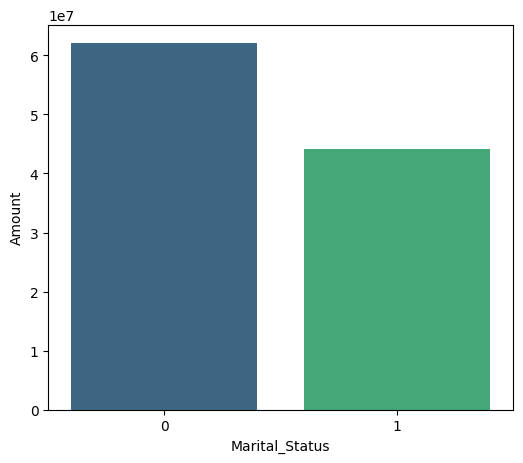

In [117]:
sale=data.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(6,5))
sns.barplot(data=sale, x='Marital_Status', y='Amount',palette='viridis')
plt.show()

## Married females had made more purchases and had spended more amount

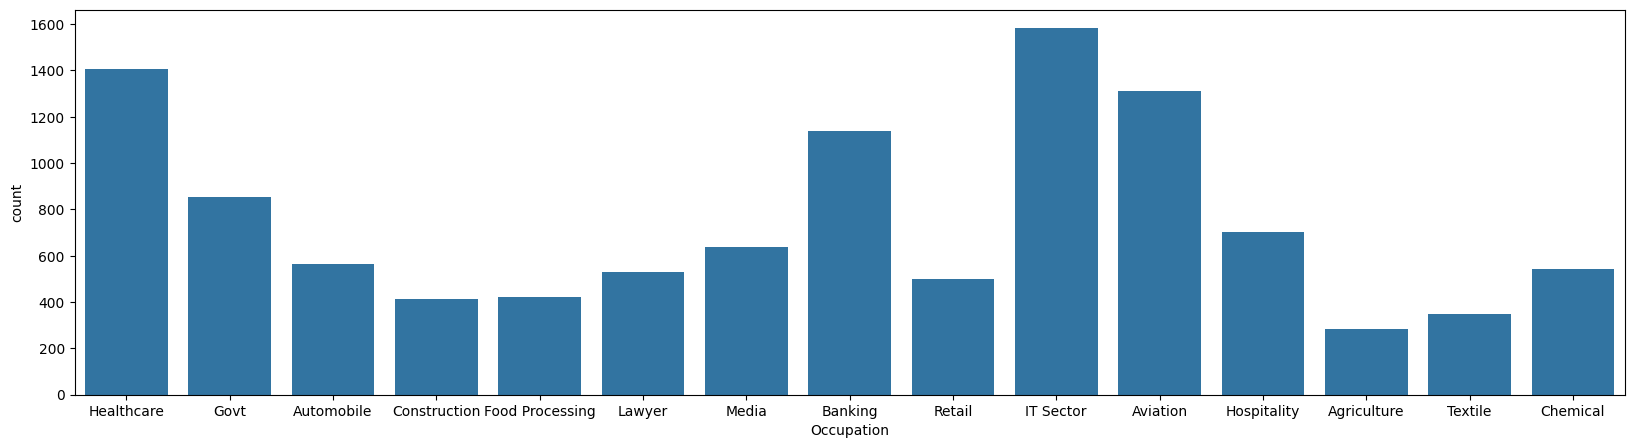

In [124]:
plt.figure(figsize=(20,5))
sns.countplot(data=data, x='Occupation')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3528\3253035406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale, x='Occupation', y='Amount',palette='viridis')


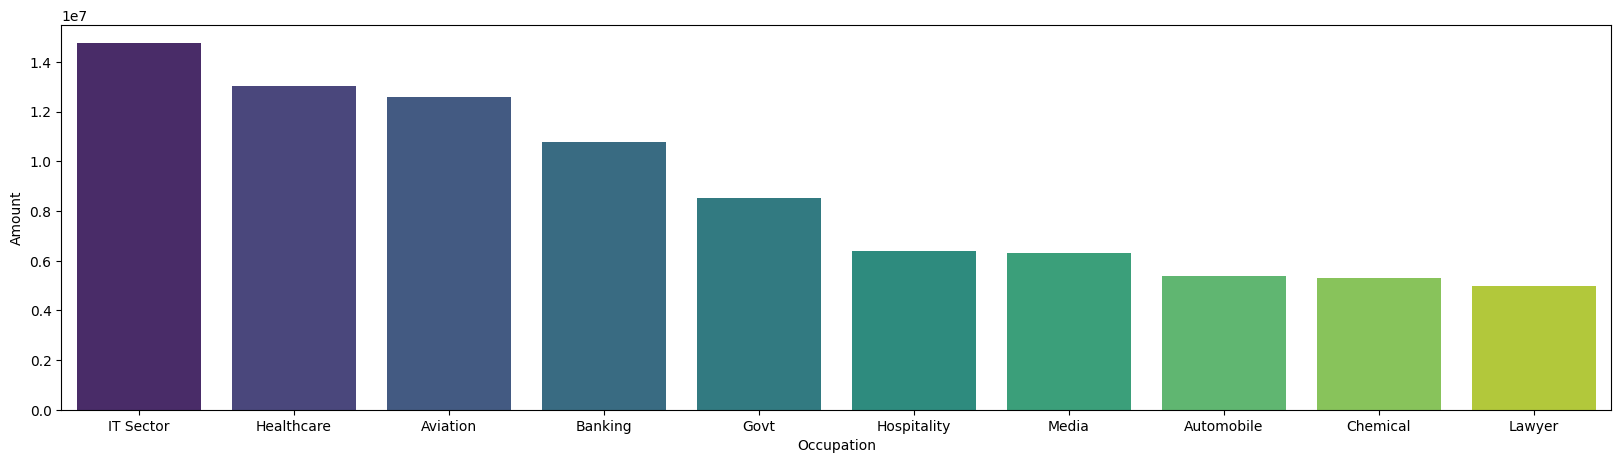

In [126]:
sale=data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(data=sale, x='Occupation', y='Amount',palette='viridis')
plt.show()

## From the avbove graphs we can see most of the buyers are woking it IT Sector, Healthcare and Aviation

C:\Users\User\AppData\Local\Temp\ipykernel_3528\1630730728.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data, x='Product_Category',palette='Set2')


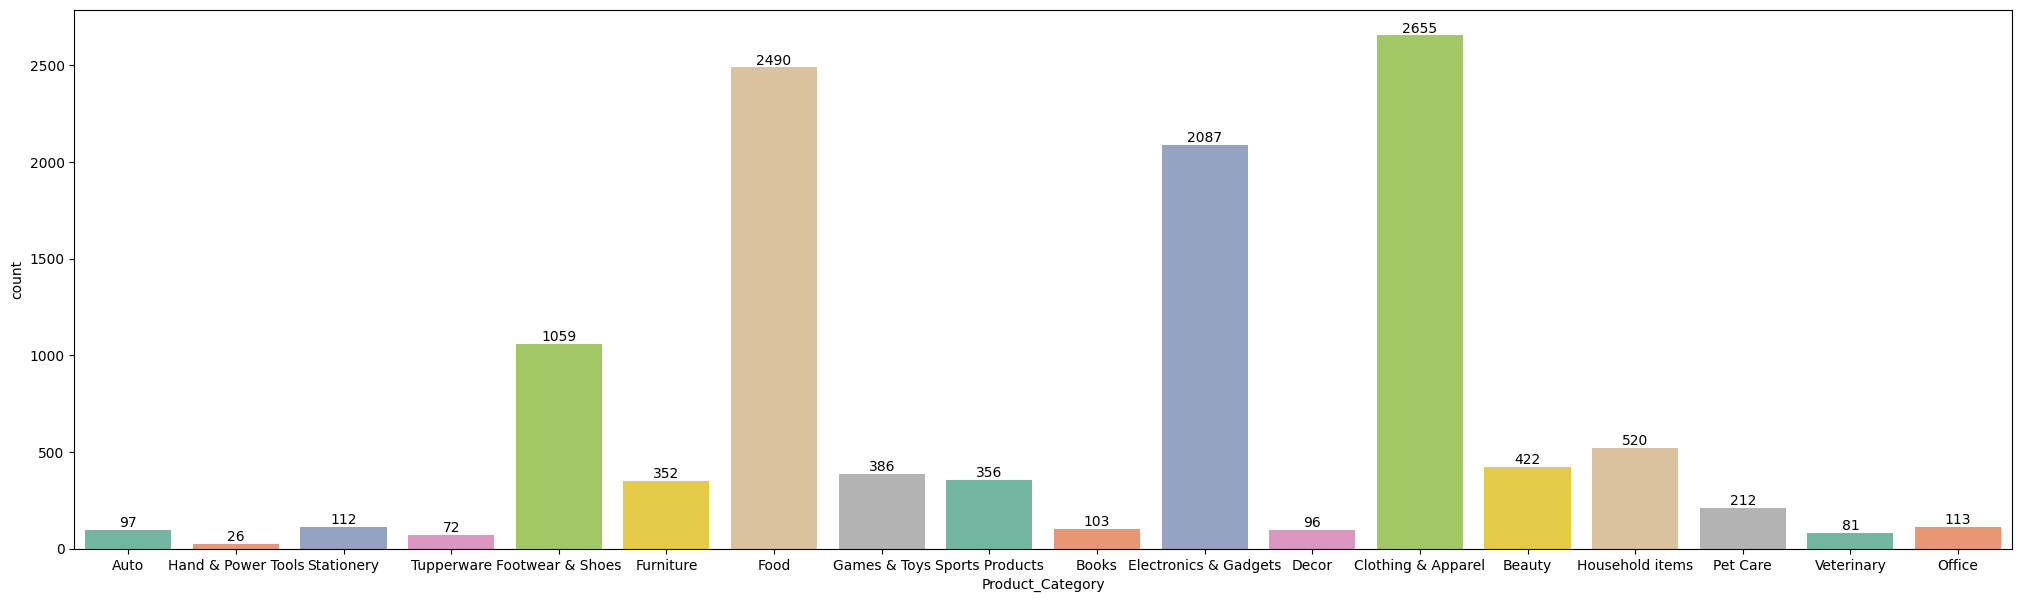

In [134]:
plt.figure(figsize=(25,7))
ax=sns.countplot(data=data, x='Product_Category',palette='Set2')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_3528\4205723489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale, x='Product_Category', y='Amount',palette='viridis')


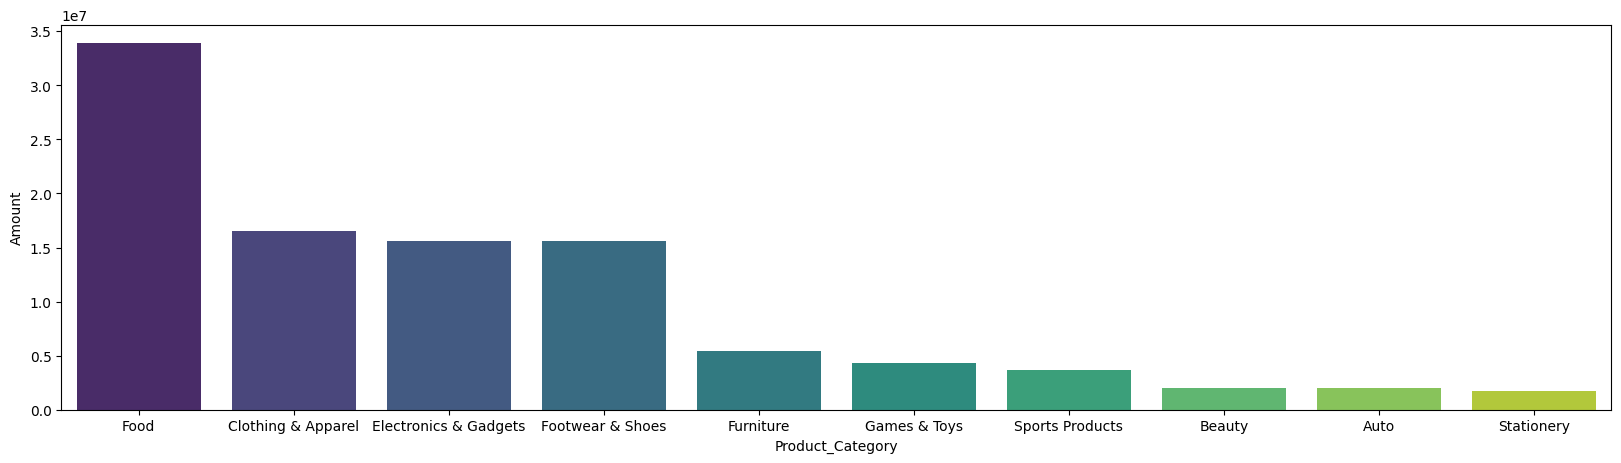

In [135]:
sale=data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(data=sale, x='Product_Category', y='Amount',palette='viridis')
plt.show()

## From the above graph we can see most products are from Food,Clothing and Electronics

# CONCLUSION
Married Womens of the age group 26-35 from the States of UP,Maharastra and Karnataka working in the IT,Healthcare and Aviation sector are more likely to buy products from the category of Food, Clothing and Electronics.